In [81]:
import os
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
%matplotlib inline

def plot_perf(file_name, varx, ds):
    if varx == 'min':
        varx = 'amin'
    if varx == 'max':
        varx = 'amax'

    if varx not in ('amin', 'amax', 'mean'):
        return "Please select from ('min', 'max', 'mean')"
    
    df1 = pd.read_csv(file_name, header=-1, skiprows=4)

    ttl_var = file_name.split('_')[0].replace('./','')
    df1.columns = ['Epoch','Epsilon', 'Batch','Ys','Recall','Precision','F1', 'Query']
    df1['Recall'] = df1['Recall'].str.replace("Recall = ",'').str.replace('\{','').astype(float)
    df1['Precision'] = df1['Precision'].str.replace("Precision = ",'').str.replace('\}','').astype(float)
    df1['F1'] = df1['F1'].str.replace("F1 = ",'').str.replace('\}','').astype(float)
    df1['Epoch'] = df1['Epoch'].str.replace("Epoch", '').astype(int)
    df1['Ys1'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[0].astype(int)
    df1['YsT'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[1].astype(int)
    df1['Ys0'] = df1['YsT'] - df1['Ys1']
    df1['Query'] = df1['Query'].str.replace('query = ', '').str.replace("\t", '').str.strip()
    ms = []

#     for metric in ('Ys0', 'Ys1', 'YsT'):
    for metric in ('Precision', 'Recall', 'F1'):
        df1ss = df1#[ (df1['Query'] == ds ) & (df1['Batch'] == ' minibatch 2/2')]
        grouped = df1ss[[metric,'Epoch']].groupby(['Epoch'])
        df2 = grouped.agg({np.min, np.mean, np.max })
        df2.columns = df2.columns.droplevel(0)
        df2 = df2.rename_axis(None, axis=1)
        df2 = df2.reset_index()
        ms.append( (metric, df2[varx] ))
        print('Average performance of %s is %.6f', (metric, df2['mean'].max()))

    plt.figure(figsize=(16, 8))
    plt.title(ttl_var + ' average precision, recall, and f1 across epochs')
    plt.plot(df2['Epoch'], ms[0][1], label=ms[0][0], c='purple')
    plt.plot(df2['Epoch'], ms[1][1], label=ms[1][0], c='blue')
    plt.plot(df2['Epoch'], ms[2][1], label=ms[2][0], c='red')
#     plt.ylim(0,1)
    plt.xlabel('Epochs')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()
    
    return df1

('Average performance of %s is %.6f', ('Precision', 0.029215666666666668))
('Average performance of %s is %.6f', ('Recall', 0.15718133333333334))
('Average performance of %s is %.6f', ('F1', 0.047013333333333331))


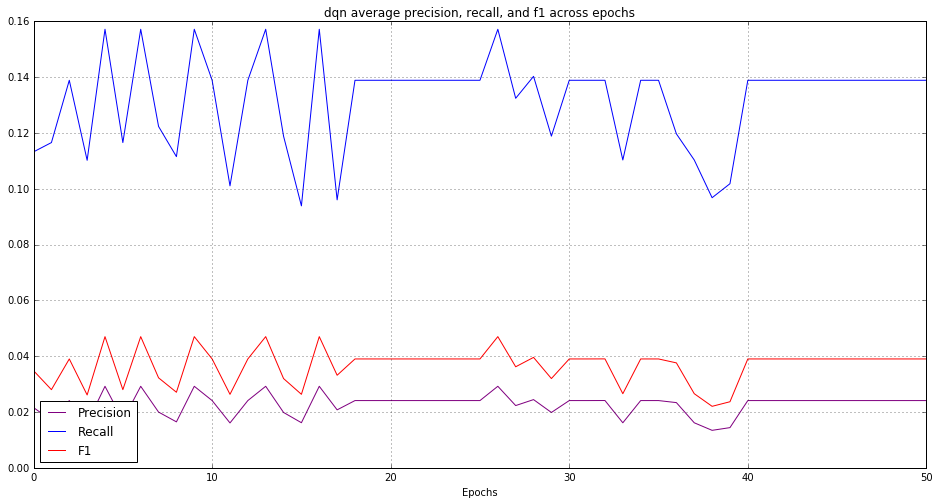

In [82]:
bowdf = plot_perf('./dqn_full_bow_model_perf.txt', 'mean', 'aurora')

('Average performance of %s is %.6f', ('Precision', 0.029215666666666668))
('Average performance of %s is %.6f', ('Recall', 0.16080466666666668))
('Average performance of %s is %.6f', ('F1', 0.047013333333333331))


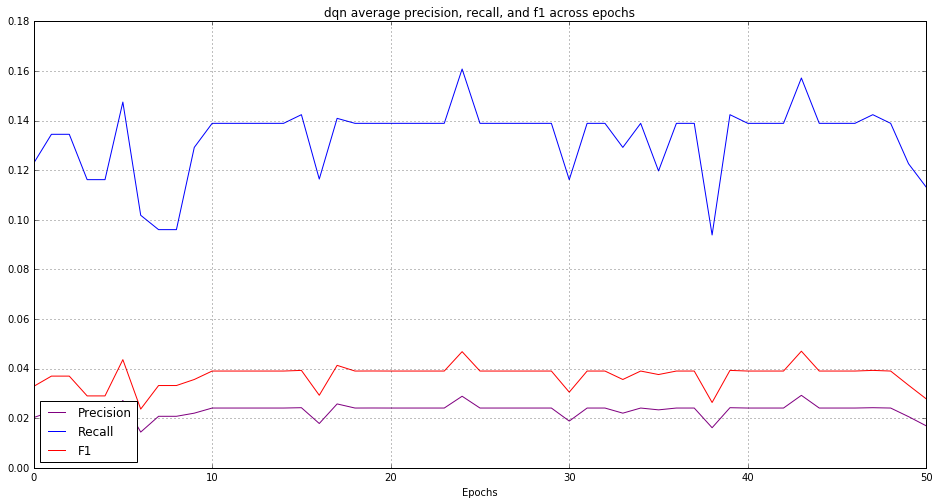

In [83]:
lstmdf = plot_perf('./dqn_full_lstm_model_perf.txt', 'mean', 'aurora')

In [ ]:
rnndf = plot_perf('./dqn_full_lstm_model_perf.txt', 'mean', 'aurora')

In [ ]:
rnndf = plot_perf('./dqn_full_lstm_model_perf.txt', 'mean', 'pakistan')

In [ ]:
bowdf.head()

In [ ]:
bowdf[ bowdf['Epoch']==0].F1.plot(kind='density', color='blue')
bowdf[ bowdf['Epoch']==0].Recall.plot(kind='density', color='red')
bowdf[ bowdf['Epoch']==0].Precision.plot(kind='density', color = 'purple')

In [ ]:
plot_perf('./dqn_full_lstm_model_perf.txt', 'mean')

In [ ]:
plot_perf('./dqn_lstm_model_perf.txt', 'mean')

In [ ]:
plot_perf('./dqn_bow_model_perf.txt', 'mean')